In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('data/raw/train.csv').set_index('PassengerId')
test = pd.read_csv('data/raw/test.csv').set_index('PassengerId')

# Decision Tree

In [7]:
x = train.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
y = train.Survived

In [8]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state = 0)

In [9]:
from sklearn import tree
model = tree.DecisionTreeClassifier().fit(train_x, train_y)

ValueError: could not convert string to float: 'female'

In [ ]:
model

## Visualization

In [42]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [43]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

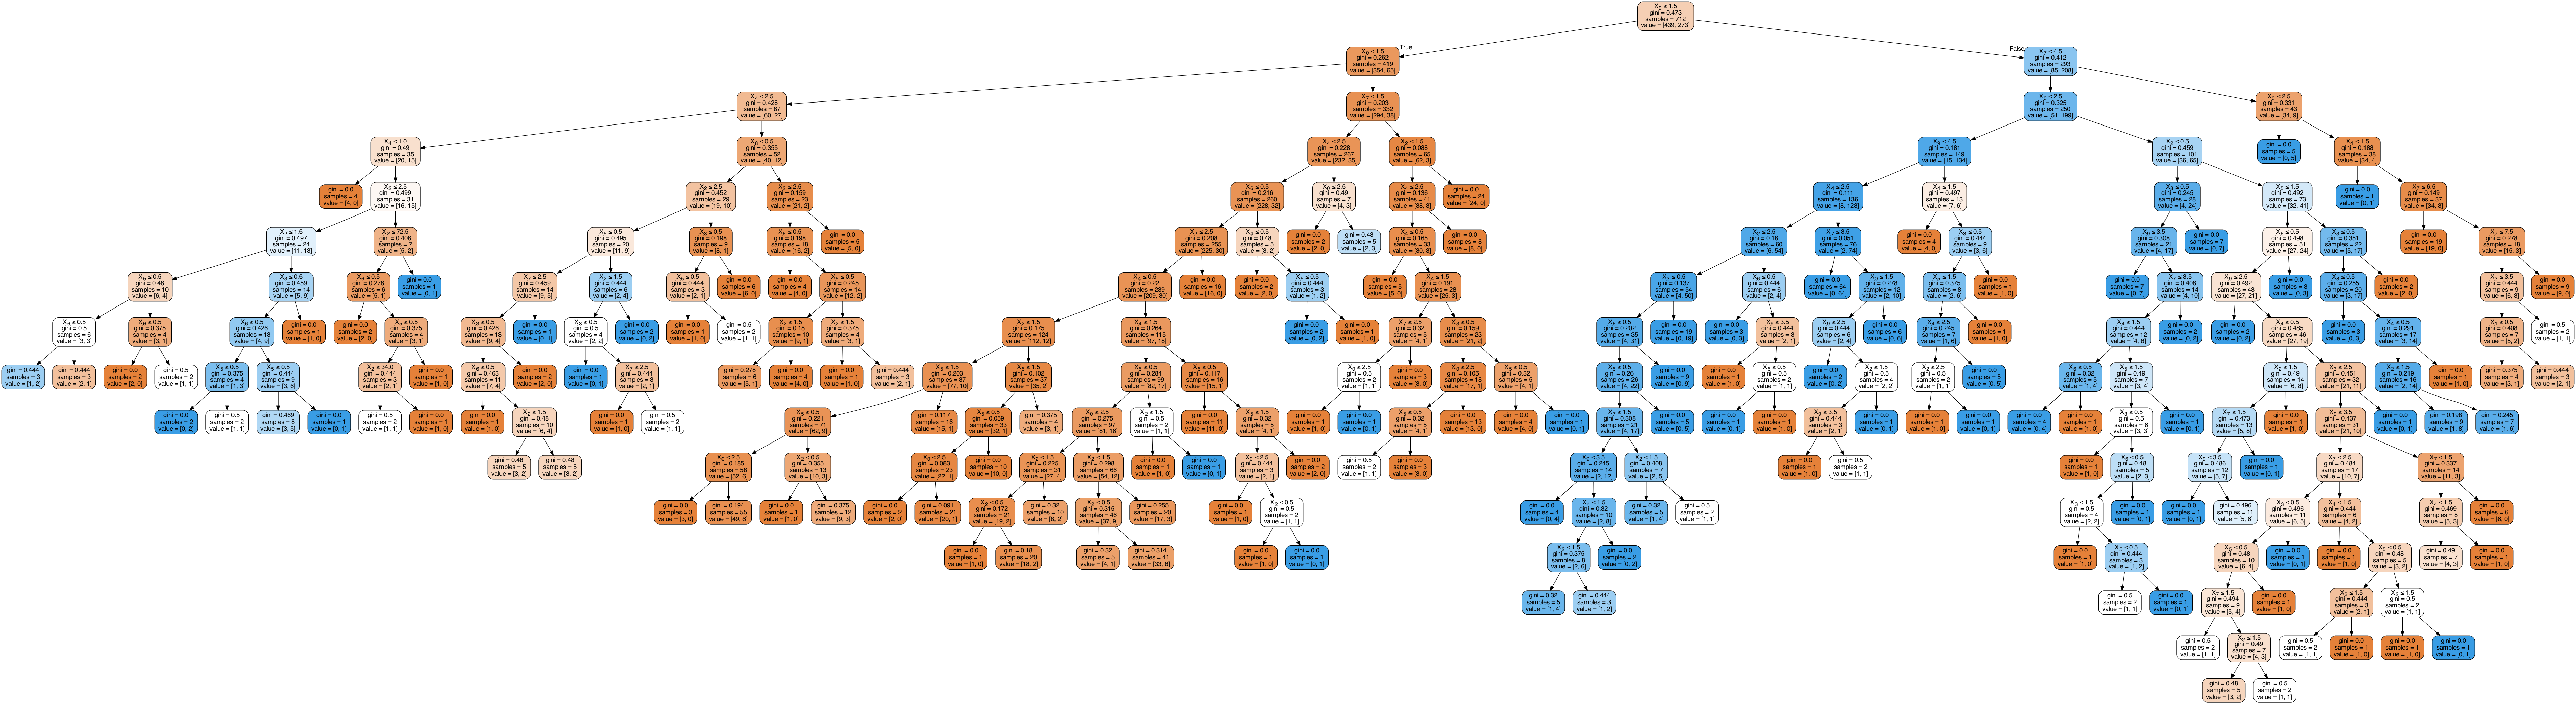

In [44]:
Image(graph.create_png())
# https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084

# Grid Search

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = [
  {'max_depth': np.arange(5, 20), 'min_samples_split': np.arange(10, 100, 5), 'min_samples_leaf': np.arange(10, 100, 5)}
 ]

In [47]:
model = GridSearchCV(model, param_grid, cv=5)

In [ ]:
model.fit(train_x, train_y)
model.best_estimator_

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from scipy.stats import norm

In [ ]:
scores = cross_val_score(model, train_x, train_y, cv=5)

In [ ]:
scores.mean()

In [ ]:
(scores.mean() - scores.std()*2, scores.mean() + scores.std()*2)

## Train

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [32]:
train_predict = model.predict(train_x)
train_predict[:5]

array([1, 0, 0, 0, 0])

In [33]:
print(classification_report(train_y, train_predict, target_names = ['Died', 'Survived']))

             precision    recall  f1-score   support

       Died       0.84      0.88      0.86       439
   Survived       0.80      0.73      0.76       273

avg / total       0.82      0.82      0.82       712



In [34]:
fpr, tpr, thresholds = roc_curve(train_y, train_predict)

In [35]:
roc_auc_score(train_y, train_predict)

0.8063823041043998

## Test

In [36]:
test_predict =  model.predict(test_x)
test_predict[:5]

array([0, 0, 0, 1, 1])

In [37]:
print(classification_report(test_y, test_predict, target_names = ['Died', 'Survived']))

             precision    recall  f1-score   support

       Died       0.84      0.81      0.82       110
   Survived       0.71      0.75      0.73        69

avg / total       0.79      0.79      0.79       179



In [38]:
fpr, tpr, thresholds = roc_curve(train_y, train_predict)
roc_auc_score(train_y, train_predict)

0.8063823041043998

# Result

In [39]:
result = model.predict(test)
result = np.concatenate([test.index.values[:, np.newaxis], result[:, np.newaxis]], axis = 1)
result = pd.DataFrame(result, columns = ['PassengerId', 'Survived'])
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [40]:
result.shape

(418, 2)

In [41]:
#result.to_csv('result.csv', index = False)